<center><p float="center">
  <img src="https://upload.wikimedia.org/wikipedia/commons/e/e9/4_RGB_McCombs_School_Brand_Branded.png" width="300" height="100"/>
  <img src="https://mma.prnewswire.com/media/1458111/Great_Learning_Logo.jpg?p=facebook" width="200" height="100"/>
</p></center>

<center><font size=10>Artificial Intelligence and Machine Learning</font></center>
<center><font size=6>Ensemble Techniques and Model Tuning</font></center>

<center><img src="https://images.pexels.com/photos/7235894/pexels-photo-7235894.jpeg?auto=compress&cs=tinysrgb&w=1260&h=750&dpr=2" width="800" height="500"></center>

<center><font size=6>Visa Approval Facilitation</font></center>

# **Problem Statement**

## Context

Business communities in the United States are facing high demand for human resources, but one of the constant challenges is identifying and attracting the right talent, which is perhaps the most important element in remaining competitive. Companies in the United States look for hard-working, talented, and qualified individuals both locally as well as abroad.

The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on their wages or working conditions by ensuring US employers' compliance with statutory requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

OFLC processes job certification applications for employers seeking to bring foreign workers into the United States and grants certifications in those cases where employers can demonstrate that there are not sufficient US workers available to perform the work at wages that meet or exceed the wage paid for the occupation in the area of intended employment.

## Objective

In FY 2016, the OFLC processed 775,979 employer applications for 1,699,957 positions for temporary and permanent labor certifications. This was a nine percent increase in the overall number of processed applications from the previous year. The process of reviewing every case is becoming a tedious task as the number of applicants is increasing every year.

The increasing number of applicants every year calls for a Machine Learning based solution that can help in shortlisting the candidates having higher chances of VISA approval. OFLC has hired the firm EasyVisa for data-driven solutions. You as a data  scientist at EasyVisa have to analyze the data provided and, with the help of a classification model:

* Facilitate the process of visa approvals.
* Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case status.

## Data Description

The data contains the different attributes of employee and the employer. The detailed data dictionary is given below.

* case_id: ID of each visa application
* continent: Information of continent the employee
* education_of_employee: Information of education of the employee
* has_job_experience: Does the employee has any job experience? Y= Yes; N = No
* requires_job_training: Does the employee require any job training? Y = Yes; N = No
* no_of_employees: Number of employees in the employer's company
* yr_of_estab: Year in which the employer's company was established
* region_of_employment: Information of foreign worker's intended region of employment in the US.
* prevailing_wage:  Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment.
* unit_of_wage: Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.
* full_time_position: Is the position of work full-time? Y = Full Time Position; N = Part Time Position
* case_status:  Flag indicating if the Visa was certified or denied

## Note: This is a sample solution for the project. Projects will NOT be graded on the basis of how well the submission matches this sample solution. Projects will be graded on the basis of the rubric only.

# **Importing necessary libraries**

In [162]:
# Installing the libraries with the specified version.
!pip install numpy==2.0.2 pandas==2.2.2 scikit-learn==1.6.1 matplotlib==3.10.0 seaborn==0.13.2 xgboost==3.0.5 -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [163]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# To tune model, get different metric scores, and split data
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    ConfusionMatrixDisplay,
)
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# To impute missing values
from sklearn.impute import SimpleImputer
from sklearn import metrics

# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# To do hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)
# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To help with model building
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

# To suppress scientific notations
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To supress warnings
import warnings

warnings.filterwarnings("ignore")

# **Loading the dataset**

In [164]:
visa = pd.read_csv("https://raw.githubusercontent.com/uday-d4/UTAI_AdvancedMachineLearningProject/refs/heads/main/EasyVisa.csv") ##Read the data


# **Overview of the Dataset**

In [165]:
visa.shape

(25480, 12)

* The dataset has 25480 rows and 12 columns

In [166]:
# let's create a copy of the data
df = visa.copy()

### Displaying the first and last few rows of the dataset

In [167]:
# let's view the first 5 rows of the data
df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.203,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.650,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.860,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.030,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.390,Year,Y,Certified


* Dont see any major issues with missing or incorrect values
* wage and unit of wage can probably be converted to wage/year or wage/hr to get better insights

In [168]:
# let's view the last 5 rows of the data
df.tail()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.570,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.790,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.850,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.770,Year,Y,Certified
25479,EZYV25480,Asia,Bachelor's,Y,N,3195,1960,Midwest,70876.910,Year,Y,Certified


### Checking the data types of the columns for the dataset

In [169]:
# let's check the data types of the columns in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB




*   Only 3 variables are of numerical data type, rest of them are objects
*   None of them have null values



###Checking for duplicate values

In [170]:
df.duplicated().sum()

np.int64(0)

###Checking for missing values

In [171]:
round(df.isnull().sum() / df.isnull().count() * 100, 2)

,0
case_id,0.000
continent,0.000
education_of_employee,0.000
has_job_experience,0.000
requires_job_training,0.000
no_of_employees,0.000
yr_of_estab,0.000
region_of_employment,0.000
prevailing_wage,0.000
unit_of_wage,0.000




*   We have no duplicate values
*   We have no null values



In [172]:
# let's view the statistical summary of the numerical columns in the data
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
case_id,25480,25480,EZYV25480,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
continent,25480,6,Asia,16861,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education_of_employee,25480,4,Bachelor's,10234,NaN,NaN,NaN,NaN,NaN,NaN,NaN
has_job_experience,25480,2,Y,14802,NaN,NaN,NaN,NaN,NaN,NaN,NaN
requires_job_training,25480,2,N,22525,NaN,NaN,NaN,NaN,NaN,NaN,NaN
no_of_employees,25480.000,NaN,NaN,NaN,5667.043,22877.929,-26.000,1022.000,2109.000,3504.000,602069.000
yr_of_estab,25480.000,NaN,NaN,NaN,1979.410,42.367,1800.000,1976.000,1997.000,2005.000,2016.000
region_of_employment,25480,5,Northeast,7195,NaN,NaN,NaN,NaN,NaN,NaN,NaN
prevailing_wage,25480.000,NaN,NaN,NaN,74455.815,52815.942,2.137,34015.480,70308.210,107735.513,319210.270
unit_of_wage,25480,4,Year,22962,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Observations**

*   Number of employees has a mean of 5667 and median of 2109. The distribution is skewed
*   Years established ranges from 1800 to 2016
*   Prevailing_wage ranges from 2 to 319,210. 2 seems too low, could be due to unit of wage
*   There are negative values on no_of_employees which could be a data entry error
*   More than half of the employees are from Asia
*   Around 40% (10234/25480) the employees have Bachelors degree



In [173]:
# list of all categorical variables
cat_col = df.columns

# printing the number of occurrences of each unique value in each categorical column
for column in cat_col:
    print(df[column].value_counts(normalize=True))
    print("-" * 50)


case_id
EZYV25480   0.000
EZYV01      0.000
EZYV02      0.000
EZYV03      0.000
EZYV04      0.000
             ... 
EZYV13      0.000
EZYV12      0.000
EZYV11      0.000
EZYV10      0.000
EZYV09      0.000
Name: proportion, Length: 25480, dtype: float64
--------------------------------------------------
continent
Asia            0.662
Europe          0.146
North America   0.129
South America   0.033
Africa          0.022
Oceania         0.008
Name: proportion, dtype: float64
--------------------------------------------------
education_of_employee
Bachelor's    0.402
Master's      0.378
High School   0.134
Doctorate     0.086
Name: proportion, dtype: float64
--------------------------------------------------
has_job_experience
Y   0.581
N   0.419
Name: proportion, dtype: float64
--------------------------------------------------
requires_job_training
N   0.884
Y   0.116
Name: proportion, dtype: float64
--------------------------------------------------
no_of_employees
183     0.001
854 

**Fixing the negative values in number of employees columns**

In [174]:
df.loc[df["no_of_employees"] < 0].shape

(33, 12)

*  There are 33 entries where number of employees is less than 0
*  Its probably an error with sign to taking absolute value may make better sense that mean

In [175]:
df['no_of_employees'] = abs(df['no_of_employees'])

In [176]:
# checking the number of unique values
df["case_id"].nunique()

25480

* case_id is unique for each candidate and might not add value to the modeling so drop it

In [177]:
df.drop(["case_id"], axis=1, inplace=True)

# <a name='link2'>**Exploratory Data Analysis (EDA)**</a>

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Leading Questions**

What is the distribution of visa case statuses (certified vs. denied)?


1. What is the distribution of visa case statuses (certified vs. denied)?
2. How does the education level of employees impact visa approval rates?
3. Is there a significant difference in visa approval rates between employees with and without prior job experience?
4. How does the prevailing wage affect visa approval? Do higher wages lead to higher chances of approval?
5. Do certain regions in the US have higher visa approval rates compared to others?
6. How does the number of employees in a company influence visa approval? Do larger companies have a higher approval rate?
7. Are visa approval rates different across various continents of employees? Which continent has the highest and lowest approval rates?

In [178]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [179]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [180]:
### Function to plot distributions


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

###Univariate Analysis


**Observations on education of employee**



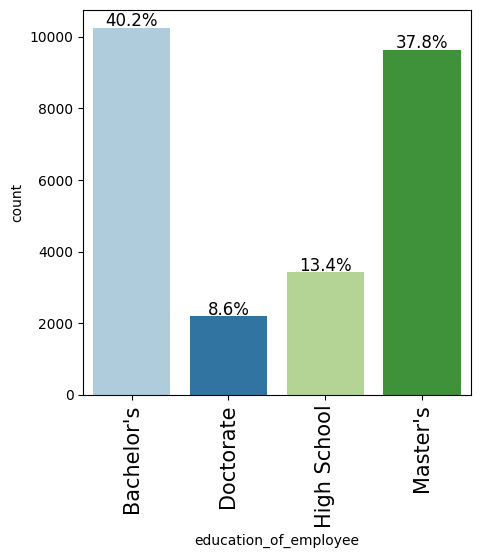

In [181]:
labeled_barplot(df, "education_of_employee", perc=True)


*  40% of employees have Bachelor degree
*  38% of employees have Masters degree
*  13% of employees are High School educated
*  9% of employees have Doctorate

**Observations on region of employment**


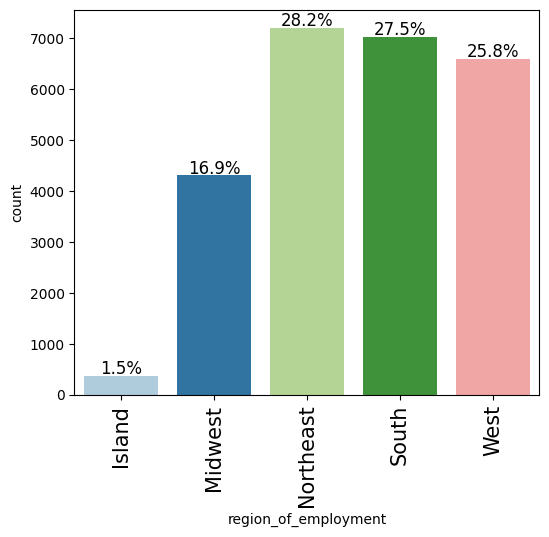

In [182]:
labeled_barplot(df, "region_of_employment", perc=True)



*   Northeast, South and West account for around 80% for the cases
*   Island and Midwest account for 20%



**Observations on job experience**

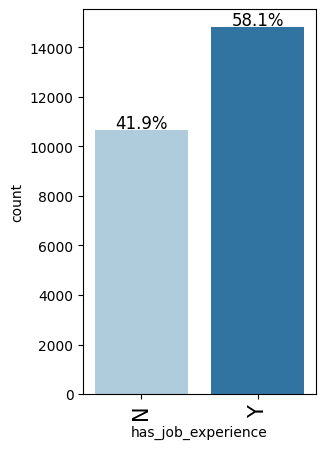

In [183]:
labeled_barplot(df, "has_job_experience", perc=True)

*  58% of the cases have job experince
*  42% of the cases have no job experince

**Observations on no_of_employees**

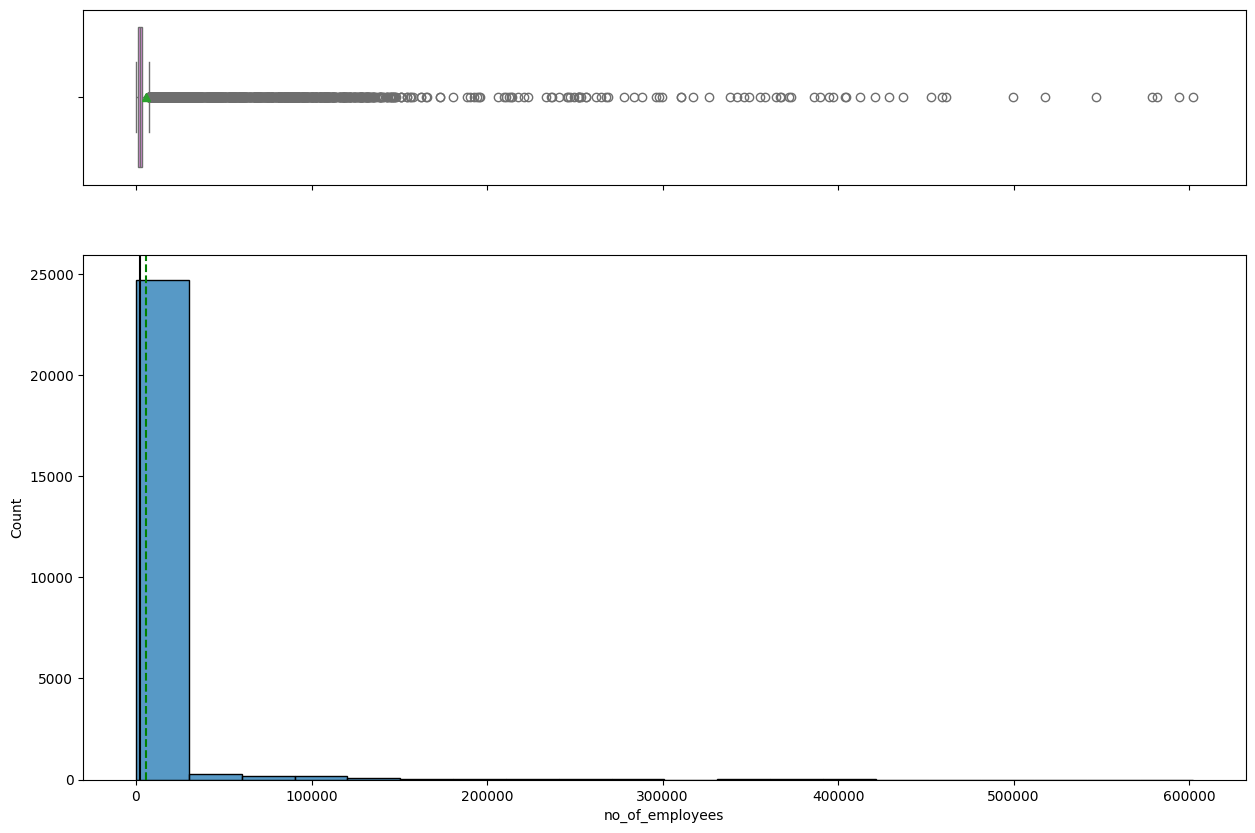

In [184]:

histogram_boxplot(df, 'no_of_employees', bins = 20)

*  The distribution of the number of employees is extremly skewed to the right

**Observations on yr_of_estab**

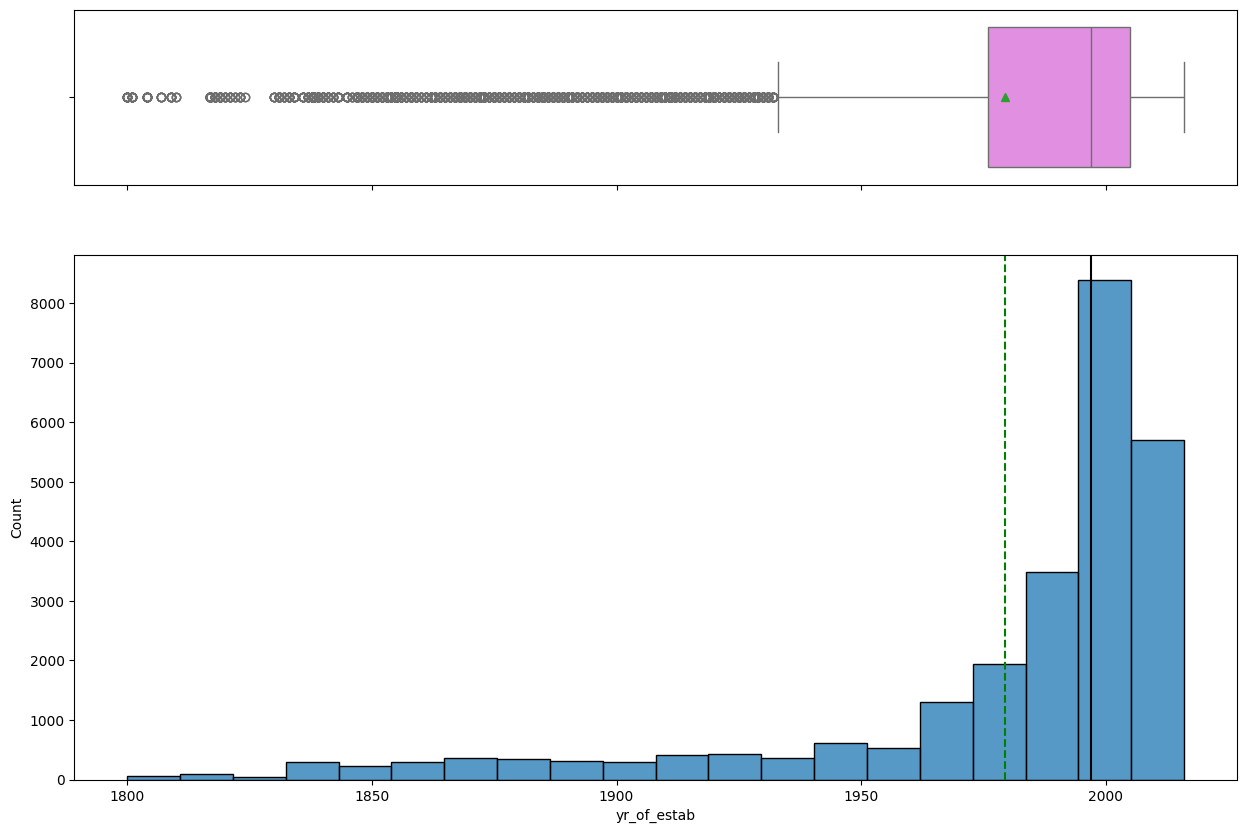

In [185]:
histogram_boxplot(df, 'yr_of_estab', bins = 20)

*  Distribution of yr_of_estab is left-skewed.

**Observations on full_time_position**

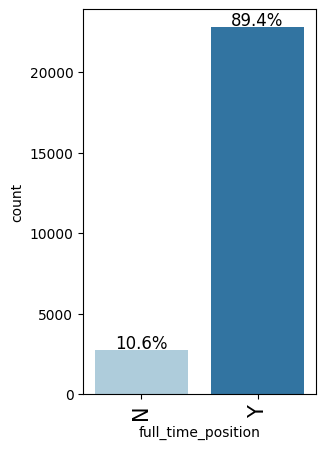

In [186]:
labeled_barplot(df, "full_time_position", perc=True)

* 90% of the cases are for full time position

**Observations on case status**

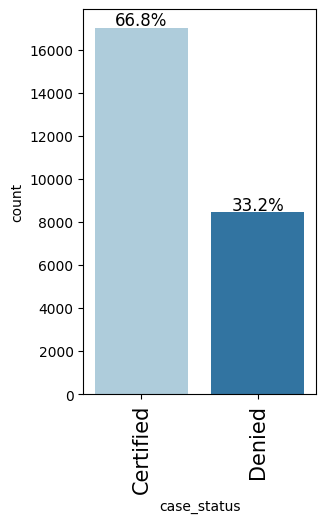

In [187]:
labeled_barplot(df, "case_status", perc=True)

* 67% of the cases are certified while 33% were denied

**Observations on unit_of_wage**


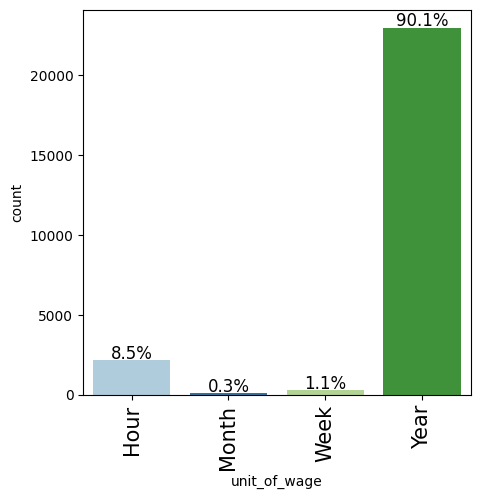

In [188]:
labeled_barplot(df, "unit_of_wage", perc=True)

* 90% of cases have yearly as unit of wage

###Bivariate Analysis


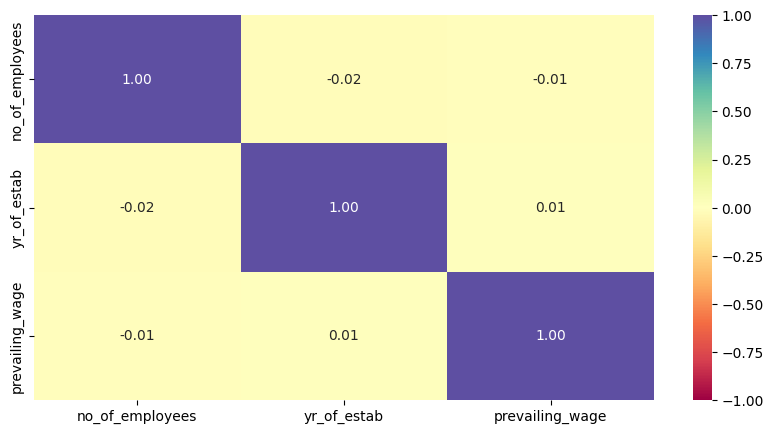

In [189]:
cols_list = df.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(10, 5))
sns.heatmap(
    df[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

* There is no strong correlation either of the variables

**Creating functions that will help us with further analysis.**


In [190]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

**Let's find out if education has any impact on visa certification**

case_status            Certified  Denied    All
education_of_employee                          
All                        17018    8462  25480
Bachelor's                  6367    3867  10234
High School                 1164    2256   3420
Master's                    7575    2059   9634
Doctorate                   1912     280   2192
------------------------------------------------------------------------------------------------------------------------


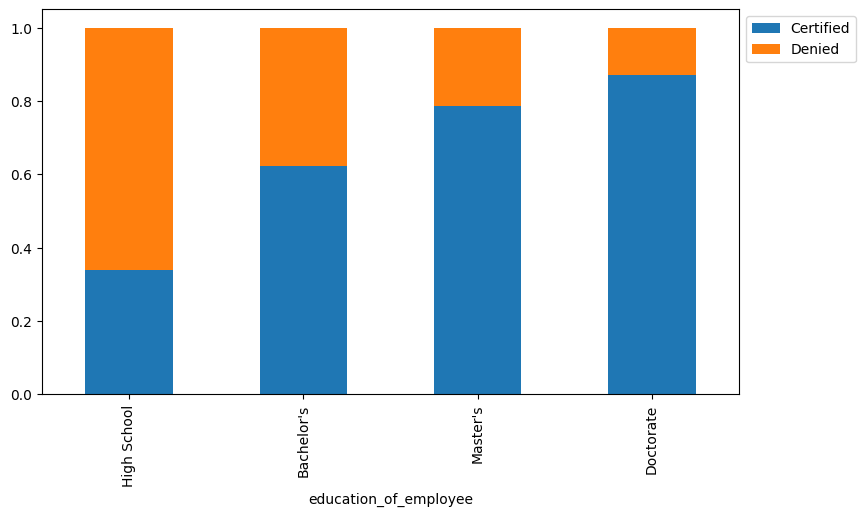

In [191]:
stacked_barplot(df, "education_of_employee", "case_status")


* The higher the education level the better the chances of approval
* Chances of approval for High School educated cases are less than 40%
* Chances af approval for Doctorate cases are over 80%
* Potential candidate for a good predictor

**Lets' check for the continents and find out how the visa status vary across different continents.**

case_status    Certified  Denied    All
continent                              
All                17018    8462  25480
Asia               11012    5849  16861
North America       2037    1255   3292
Europe              2957     775   3732
South America        493     359    852
Africa               397     154    551
Oceania              122      70    192
------------------------------------------------------------------------------------------------------------------------


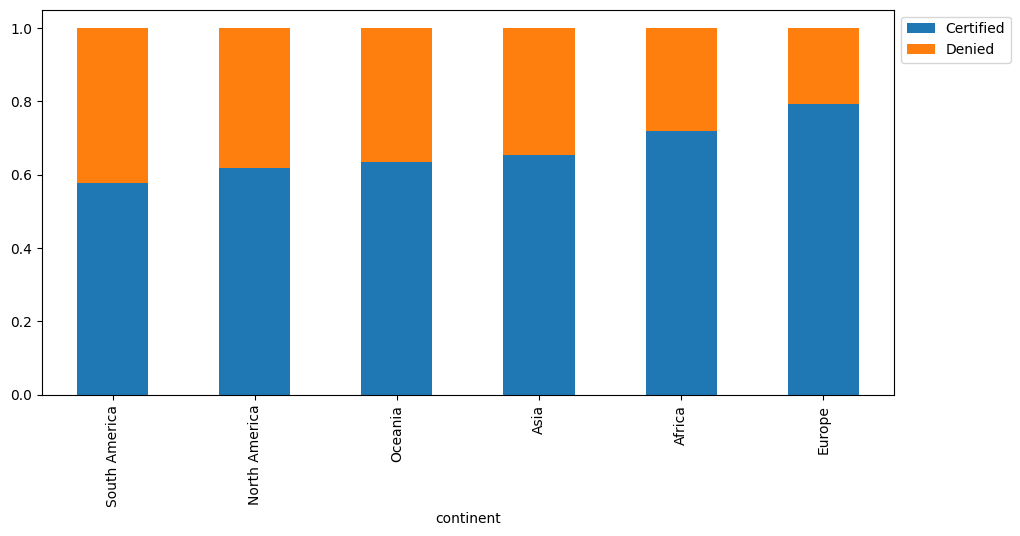

In [192]:
stacked_barplot(df, "continent", "case_status")

* Europe has the highest chances of approval 80% vs South America 60%
* Potential candidate for a good predictor

**Let's see if having work experience has any influence over visa certification**


case_status         Certified  Denied    All
has_job_experience                          
All                     17018    8462  25480
N                        5994    4684  10678
Y                       11024    3778  14802
------------------------------------------------------------------------------------------------------------------------


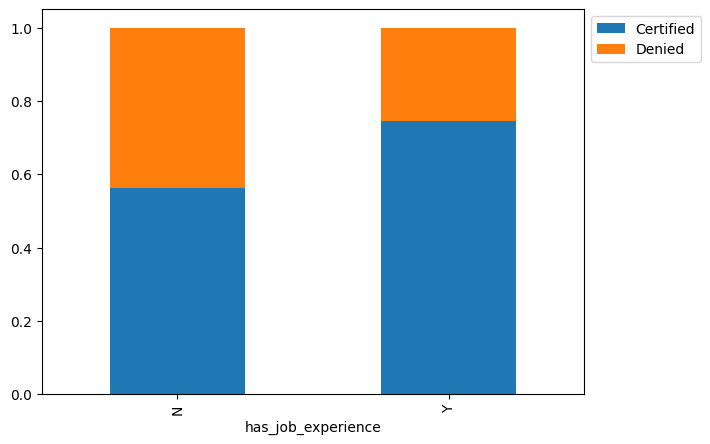

In [193]:
stacked_barplot(df, "has_job_experience", "case_status")

* Candidates with job experince are more likely to be approved(75%) vs without job experince(60%)
* Potential candidate for a good predictor

**Checking if the prevailing wage is similar across all the regions of the US**


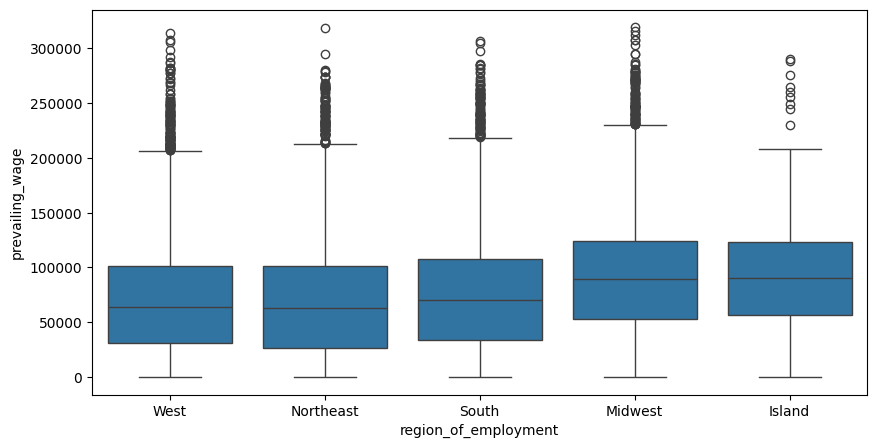

In [194]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x="region_of_employment", y="prevailing_wage")
plt.show()

*  Prevailing wages is higher in Midwest and Island


**Let's analyze the data and see if the visa status changes with the prevailing wage**

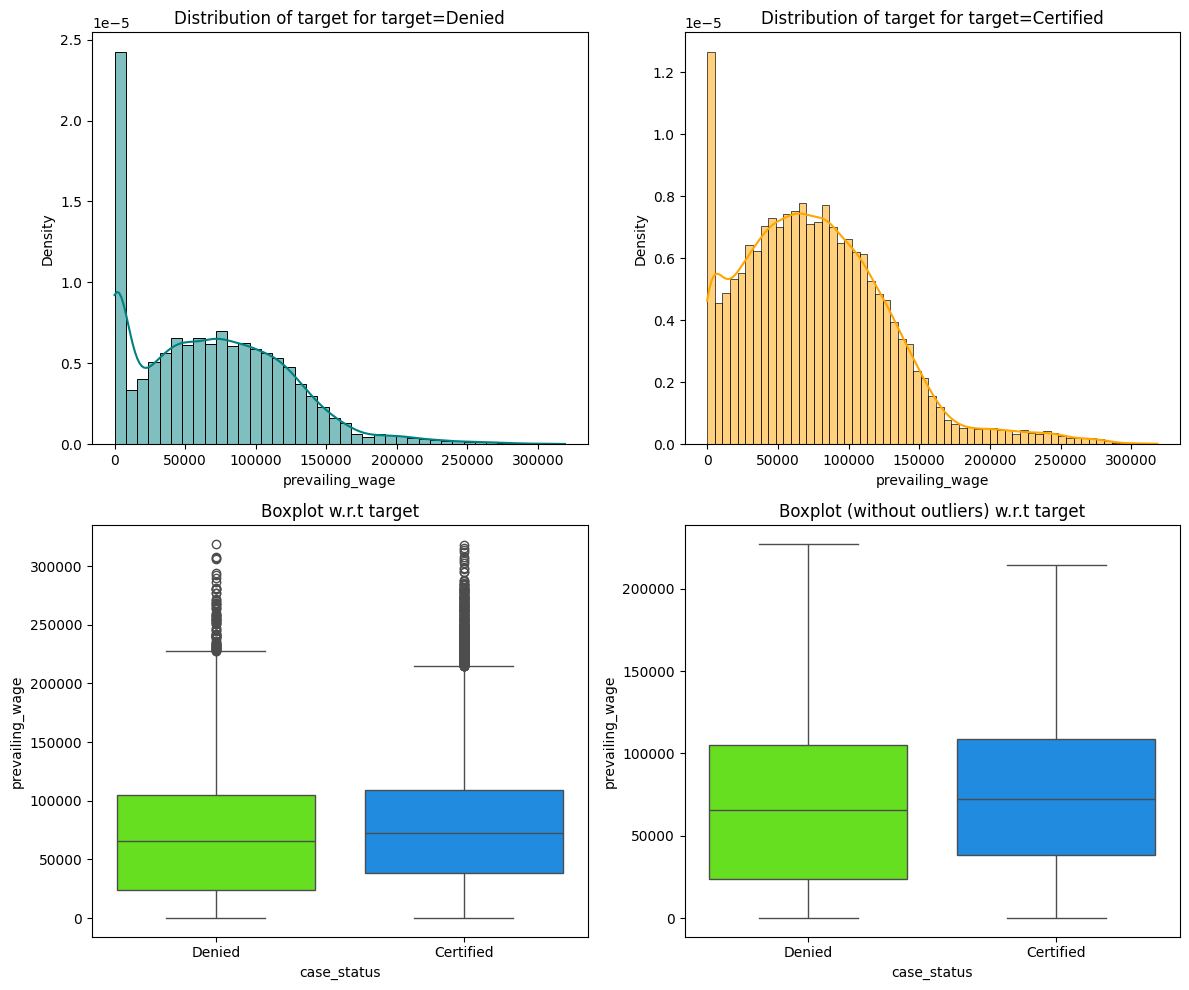

In [195]:
distribution_plot_wrt_target(df, "prevailing_wage", "case_status")


* Prevailing wage for certified and denied application is not a big differentiator\

**Observations on no_of_employees and case_status**

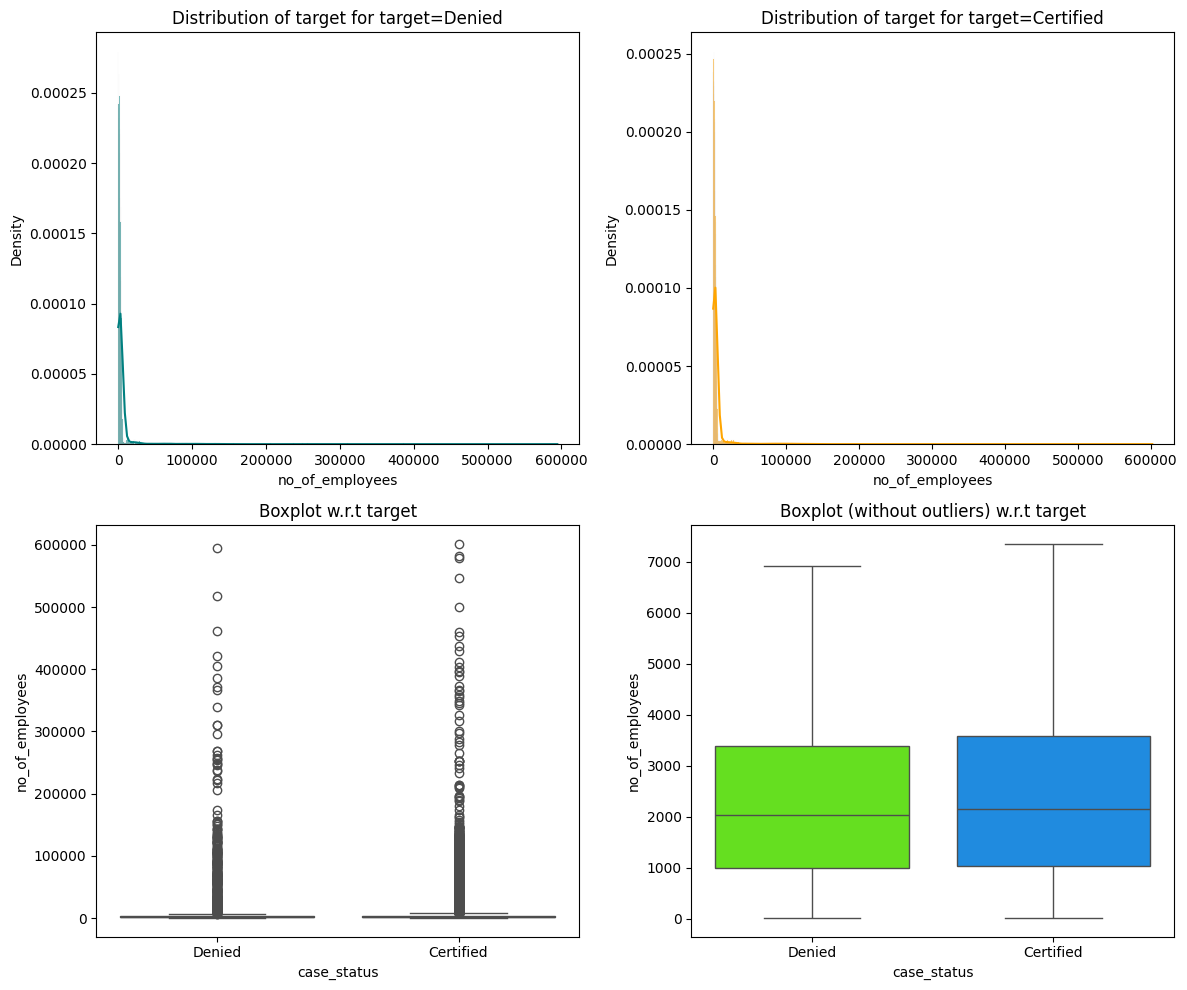

In [196]:
distribution_plot_wrt_target(df, "no_of_employees", "case_status")

* Nomber of employees for certified and denied application is almost same, not a big differentiator

**Observations on yr_of_estab and case_status**

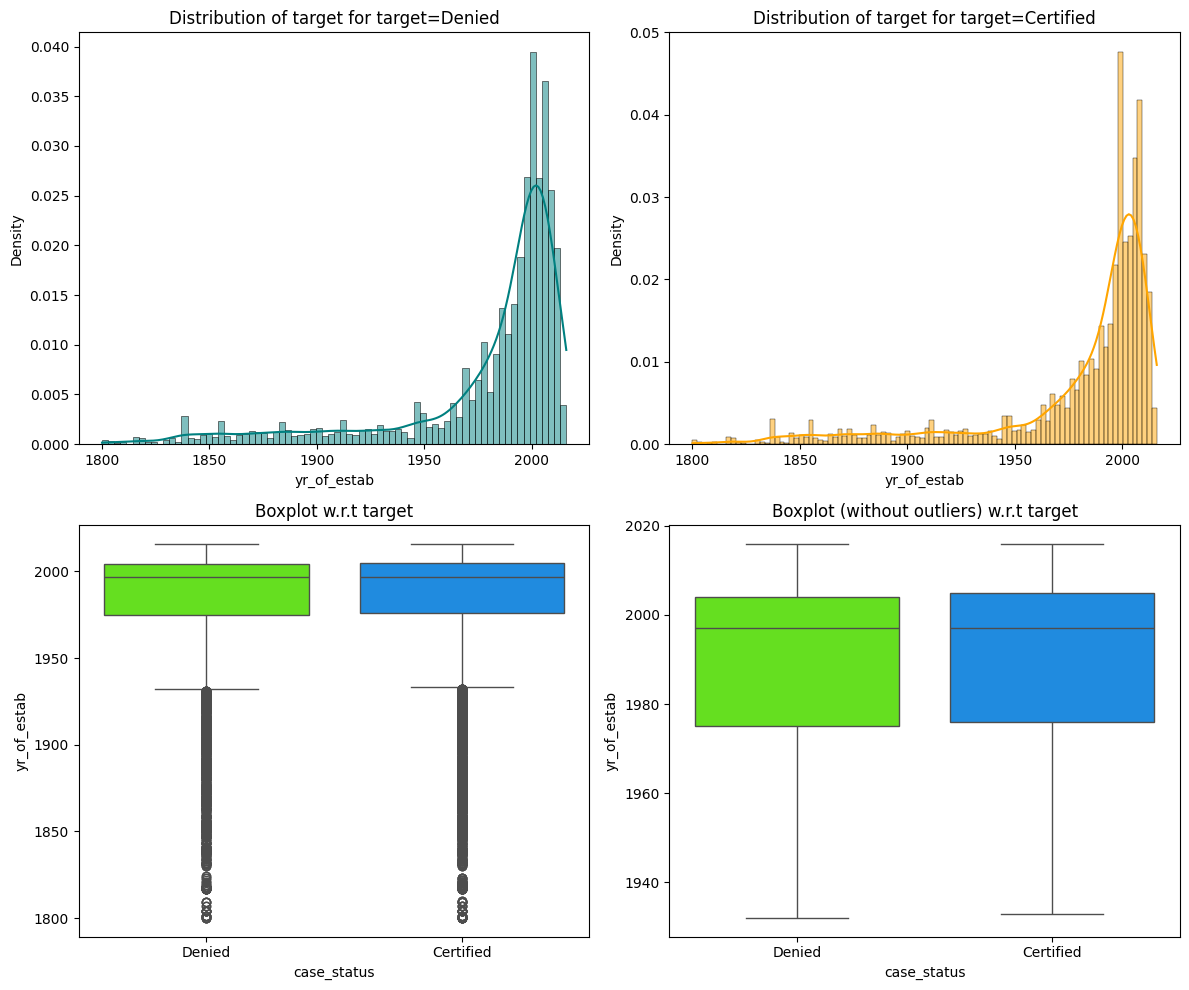

In [197]:
distribution_plot_wrt_target(df, "yr_of_estab", "case_status")

* Year established doesn't seem to impact certification

> Add blockquote



**Let's find out if it has any impact on visa applications getting certified.**

case_status  Certified  Denied    All
yr_of_estab                          
All              17018    8462  25480
1998               736     398   1134
2001               656     361   1017
2005               719     332   1051
2007               682     312    994
...                ...     ...    ...
1820                 5       1      6
1842                 5       1      6
1822                 3       1      4
1846                 4       0      4
1810                 3       0      3

[200 rows x 3 columns]
------------------------------------------------------------------------------------------------------------------------


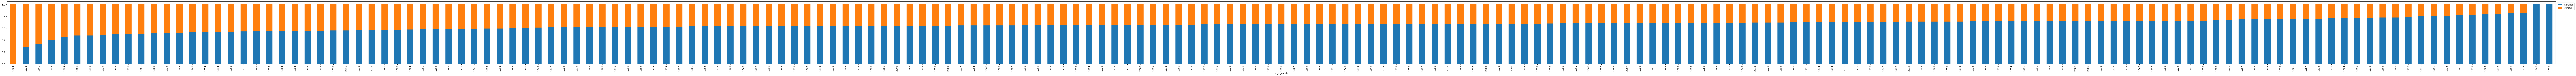

In [198]:
stacked_barplot(df, "yr_of_estab", "case_status")

* Year established doesn't seem to impact certification

**Observations on full_time_position and case_status**

case_status         Certified  Denied    All
full_time_position                          
All                     17018    8462  25480
Y                       15163    7610  22773
N                        1855     852   2707
------------------------------------------------------------------------------------------------------------------------


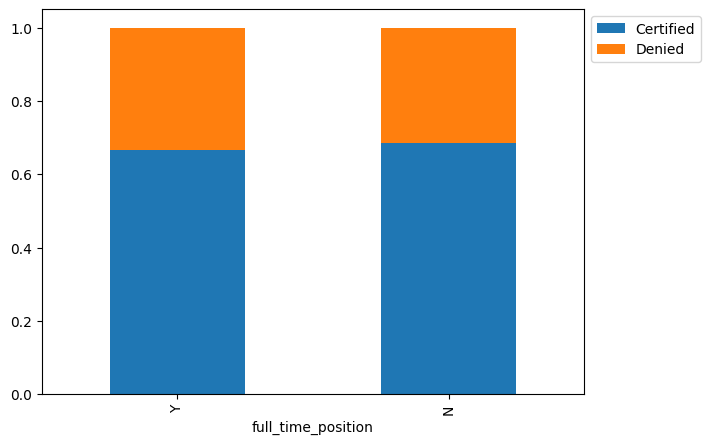

In [199]:
stacked_barplot(df, "full_time_position", "case_status")

* If its a full time position or not doesnt seem to affect certification

# **Data Pre-processing**

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

##Lets check for outliers in data


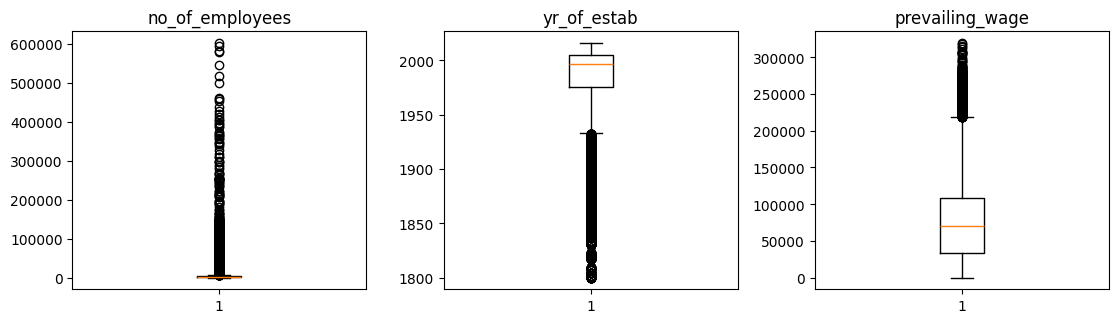

In [200]:
# outlier detection using boxplot
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()


plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

*  We will keep the outliers as they may provide valuable input

##Data Preparation for modeling


**Encode categorical features**

In [201]:
df["case_status"] = df["case_status"].apply(lambda x: 1 if x == "Certified" else 0)


**Seperate the feature to be predicted**

In [202]:
X = df.drop(["case_status"], axis=1)
y = df["case_status"]

**Splitting the data into training, validation and test sets**

In [203]:
# create dummy varialbes for categories
X = pd.get_dummies(X, drop_first=True)
# X = X.astype(float)

# Splitting data into training, validation and test set:


# Split to train and test

X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1, stratify=y
)

# then we split the temporary set into train and validation

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=1, stratify=y_temp
)

In [204]:
print("Shape of Training set : ", X_train.shape)
print("Shape of the Validation set: ", X_val.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in validation set:")
print(y_val.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (15288, 21)
Shape of the Validation set:  (5096, 21)
Shape of test set :  (5096, 21)
Percentage of classes in training set:
case_status
1   0.668
0   0.332
Name: proportion, dtype: float64
Percentage of classes in validation set:
case_status
1   0.668
0   0.332
Name: proportion, dtype: float64
Percentage of classes in test set:
case_status
1   0.668
0   0.332
Name: proportion, dtype: float64


# **Model Building**

## Model evaluation criterion

**Model can make wrong predictions as:**

*  Predicting that the visa application will get certified but in reality, the visa application should get denied.
*  Predicting that the visa application will not get certified but in reality, the visa application should get certified.

**Which case is more important?**

*  Both the cases are important as one scenario leads US citizens missing the opportunities and another leading to U.S. missing on hiring the right people to contribute to the economy.

**How to reduce the losses?**

*  **F1 Score** can be used a the metric for evaluation of the model, greater the F1 score higher are the chances of minimizing False Negatives and False Positives.
* We will use balanced class weights so that model focuses equally on both classes.

## Functions to compute metrics for comparing models

In [205]:
#defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf


In [206]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

## Initial Model Building

### Model Building - Original Data

In [207]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(estimator=DecisionTreeClassifier(random_state=1, class_weight='balanced'), random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1, class_weight='balanced')))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("XGBoost", XGBClassifier(random_state=1, eval_metric="logloss")))
models.append(("dtree", DecisionTreeClassifier(random_state=1, class_weight='balanced')))

print("\nTraining Performance:\n")
for name, model in models:
    model.fit(X_train, y_train)
    scores = f1_score(y_train, model.predict(X_train))
    print("{}: {}".format(name, scores))

print("\nValidation Performance:\n")
for name, model in models:
    model.fit(X_train, y_train)
    scores_val = f1_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores_val))


Training Performance:

Bagging: 0.9896098804156048
Random forest: 1.0
GBM: 0.8291218182658106
Adaboost: 0.8204269947530306
XGBoost: 0.8963229453814886
dtree: 1.0

Validation Performance:

Bagging: 0.7775995333236109
Random forest: 0.8049978941457251
GBM: 0.826637008202419
Adaboost: 0.8180081855388813
XGBoost: 0.8079119654547987
dtree: 0.7486033519553073


In [208]:
print("\nTraining and Validation Performance Difference:\n")

for name, model in models:
    model.fit(X_train, y_train)
    scores_train = f1_score(y_train, model.predict(X_train))
    scores_val = f1_score(y_val, model.predict(X_val))
    difference1 = scores_train - scores_val
    print("{}: Training Score: {:.4f}, Validation Score: {:.4f}, Difference: {:.4f}".format(name, scores_train, scores_val, difference1))


Training and Validation Performance Difference:

Bagging: Training Score: 0.9896, Validation Score: 0.7776, Difference: 0.2120
Random forest: Training Score: 1.0000, Validation Score: 0.8050, Difference: 0.1950
GBM: Training Score: 0.8291, Validation Score: 0.8266, Difference: 0.0025
Adaboost: Training Score: 0.8204, Validation Score: 0.8180, Difference: 0.0024
XGBoost: Training Score: 0.8963, Validation Score: 0.8079, Difference: 0.0884
dtree: Training Score: 1.0000, Validation Score: 0.7486, Difference: 0.2514


*  Adaboost and GBM have the best performance followed by the XGBoost model as per the validation performance
* Models using Bagging, Random forest and Decision tree have near perfect training scores and poor scores on validation data suggesting overfitting


### Model Building - Oversampled Data

In [209]:
print("Before Oversampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Oversampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

sm = SMOTE(
    sampling_strategy=1, k_neighbors=5, random_state=1
)  # Synthetic Minority Over Sampling Technique
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)


print("After Oversampling, counts of label 'Yes': {}".format(sum(y_train_over == 1)))
print("After Oversampling, counts of label 'No': {} \n".format(sum(y_train_over == 0)))


print("After Oversampling, the shape of train_X: {}".format(X_train_over.shape))
print("After Oversampling, the shape of train_y: {} \n".format(y_train_over.shape))

Before Oversampling, counts of label 'Yes': 10210
Before Oversampling, counts of label 'No': 5078 

After Oversampling, counts of label 'Yes': 10210
After Oversampling, counts of label 'No': 10210 

After Oversampling, the shape of train_X: (20420, 21)
After Oversampling, the shape of train_y: (20420,) 



In [210]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(estimator=DecisionTreeClassifier(random_state=1, class_weight='balanced'), random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1, class_weight='balanced')))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("XGBoost", XGBClassifier(random_state=1, eval_metric="logloss")))
models.append(("dtree", DecisionTreeClassifier(random_state=1, class_weight='balanced')))

print("\n" "Training Performance:" "\n")
for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores = f1_score(y_train_over, model.predict(X_train_over))
    print("{}: {}".format(name, scores))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores = f1_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Training Performance:

Bagging: 0.9875473741201949
Random forest: 0.9999510260051913
GBM: 0.8072434234901815
Adaboost: 0.8005498403689252
XGBoost: 0.8708686342053813
dtree: 1.0

Validation Performance:

Bagging: 0.7665171898355755
Random forest: 0.7965442764578834
GBM: 0.8173049645390071
Adaboost: 0.8195334879279771
XGBoost: 0.8129304286718201
dtree: 0.7320006012325266


In [211]:
print("\nTraining and Validation Performance Difference:\n")

for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores_train = f1_score(y_train_over, model.predict(X_train_over))
    scores_val = f1_score(y_val, model.predict(X_val))
    difference2 = scores_train - scores_val
    print("{}: Training Score: {:.4f}, Validation Score: {:.4f}, Difference: {:.4f}".format(name, scores_train, scores_val, difference2))


Training and Validation Performance Difference:

Bagging: Training Score: 0.9875, Validation Score: 0.7665, Difference: 0.2210
Random forest: Training Score: 1.0000, Validation Score: 0.7965, Difference: 0.2034
GBM: Training Score: 0.8072, Validation Score: 0.8173, Difference: -0.0101
Adaboost: Training Score: 0.8005, Validation Score: 0.8195, Difference: -0.0190
XGBoost: Training Score: 0.8709, Validation Score: 0.8129, Difference: 0.0579
dtree: Training Score: 1.0000, Validation Score: 0.7320, Difference: 0.2680


* Before SMOTE - Dataset had moderate imbalance with 67% certified vs 33% denied
* After SMOTE - We have 50% distribution with 10210 datapoints each
* AdaBoost has the best performance followed by  GBM model as per the validation
* XGBoost performance is also in par with the above two models
* Bagging, Random forest and Decision tree are overfitting

###Model Building - Undersampled Data

In [212]:
rus = RandomUnderSampler(random_state=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

In [213]:
print("Before Under Sampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Under Sampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

print("After Under Sampling, counts of label 'Yes': {}".format(sum(y_train_un == 1)))
print("After Under Sampling, counts of label 'No': {} \n".format(sum(y_train_un == 0)))

print("After Under Sampling, the shape of train_X: {}".format(X_train_un.shape))
print("After Under Sampling, the shape of train_y: {} \n".format(y_train_un.shape))

Before Under Sampling, counts of label 'Yes': 10210
Before Under Sampling, counts of label 'No': 5078 

After Under Sampling, counts of label 'Yes': 5078
After Under Sampling, counts of label 'No': 5078 

After Under Sampling, the shape of train_X: (10156, 21)
After Under Sampling, the shape of train_y: (10156,) 



In [214]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(estimator=DecisionTreeClassifier(random_state=1, class_weight='balanced'), random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1, class_weight='balanced')))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("XGBoost", XGBClassifier(random_state=1, eval_metric="logloss")))
models.append(("dtree", DecisionTreeClassifier(random_state=1, class_weight='balanced')))


print("\n" "Training Performance:" "\n")
for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores = f1_score(y_train_un, model.predict(X_train_un))
    print("{}: {}".format(name, scores))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores = f1_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Training Performance:

Bagging: 0.9803687095166915
Random forest: 1.0
GBM: 0.7281441717791411
Adaboost: 0.7015343047380103
XGBoost: 0.8720351390922401
dtree: 1.0

Validation Performance:

Bagging: 0.7057046979865772
Random forest: 0.7417218543046358
GBM: 0.776595744680851
Adaboost: 0.765990884802766
XGBoost: 0.7459304181295883
dtree: 0.6955818093542644


In [215]:
print("\nTraining and Validation Performance Difference:\n")

for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores_train = recall_score(y_train_un, model.predict(X_train_un))
    scores_val = recall_score(y_val, model.predict(X_val))
    difference3 = scores_train - scores_val
    print("{}: Training Score: {:.4f}, Validation Score: {:.4f}, Difference: {:.4f}".format(name, scores_train, scores_val, difference3))


Training and Validation Performance Difference:

Bagging: Training Score: 0.9687, Validation Score: 0.6178, Difference: 0.3509
Random forest: Training Score: 1.0000, Validation Score: 0.6745, Difference: 0.3255
GBM: Training Score: 0.7479, Validation Score: 0.7291, Difference: 0.0188
Adaboost: Training Score: 0.7158, Validation Score: 0.7159, Difference: -0.0001
XGBoost: Training Score: 0.8797, Validation Score: 0.6865, Difference: 0.1931
dtree: Training Score: 1.0000, Validation Score: 0.6313, Difference: 0.3687


* GBM gives the best F1 score followed by AdaBoost and XGBoost
* Bagging, Random forest and Decision tree are overfitting

# **Model Performance Improvement**

## Models to Tune

Based on Model analysis with original, over sampled and undersampled data we can draw the following insights -
   * GBM, Adaboost and XGBoost have superior model performance with both original and oversampled data
   * Bagging, Random Forest and Decision Tree models mostly overfit data in training and their performance on validation data is poor
   * Undersampling causes all models to perform poor
   * **We will tune GBM on original data and Adaboost and XGBoost on oversampled data**

##Hyperparameter Tuning - AdaBoost Classifier

In [216]:
%%time
# Choose the type of classifier.
abc_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    # Let's try different max_depth for base_estimator
    "estimator": [
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
    "n_estimators": np.arange(50,110,25),
    "learning_rate": np.arange(0.01,0.1,0.05),
}

# Type of scoring used to compare parameter  combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the Randomized  search
rand_obj = RandomizedSearchCV(abc_tuned, parameters, cv=5, scoring=acc_scorer, n_jobs=-1, random_state=1)
rand_obj = rand_obj.fit(X_train_over, y_train_over)

# Set the clf to the best combination of parameters
abc_tuned = rand_obj.best_estimator_

# Fit the best algorithm to the data.
abc_tuned.fit(X_train_over, y_train_over)

CPU times: user 9.03 s, sys: 98.9 ms, total: 9.13 s
Wall time: 1min 32s


AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=3,
                                                    random_state=1),
                   learning_rate=np.float64(0.060000000000000005),
                   n_estimators=np.int64(100), random_state=1)

###Checking model performance on training set


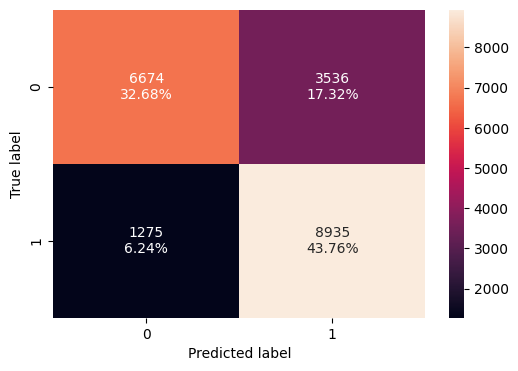

In [217]:
confusion_matrix_sklearn(abc_tuned, X_train_over, y_train_over)

In [218]:
abc_tuned_model_train_perf = model_performance_classification_sklearn(abc_tuned,X_train, y_train)
abc_tuned_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.741,0.875,0.769,0.818


###Checking model performance on validation set

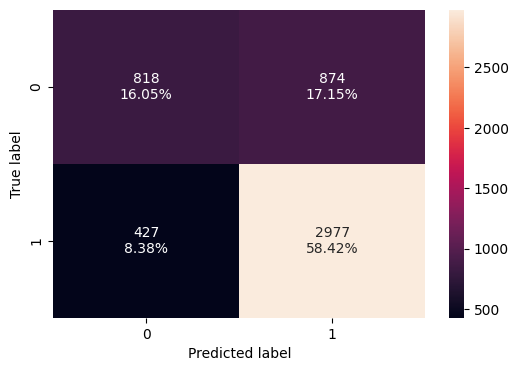

In [219]:
confusion_matrix_sklearn(abc_tuned, X_val, y_val)

In [220]:
abc_tuned_model_val_perf = model_performance_classification_sklearn(abc_tuned, X_val, y_val)  ## Complete the code to get the perfromance metrics for the Adaboost Classifier on the validation set
abc_tuned_model_val_perf

,Accuracy,Recall,Precision,F1
0,0.745,0.875,0.773,0.821


## Hyperparameter Tuning - Gradient Boosting Classifier

In [221]:
%%time
# Choose the type of classifier.
gbc_tuned = GradientBoostingClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    "n_estimators": [150,200,250,300],
    "subsample": [0.8,0.9,1],
    "max_features": [0.7, 0.8, 0.9, 1],
    "learning_rate": [0.01,0.1,0.05],
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the Randomized  search

grid_obj = RandomizedSearchCV(gbc_tuned, parameters, cv=5, scoring=acc_scorer, n_jobs=-1, random_state=1)
grid_obj = rand_obj.fit(X_train, y_train)


# Set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(X_train, y_train)

CPU times: user 7.01 s, sys: 95.2 ms, total: 7.1 s
Wall time: 1min 8s


AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=3,
                                                    random_state=1),
                   learning_rate=np.float64(0.060000000000000005),
                   n_estimators=np.int64(100), random_state=1)

###Checking model performance on training set


,Accuracy,Recall,Precision,F1
0,0.749,0.876,0.777,0.823


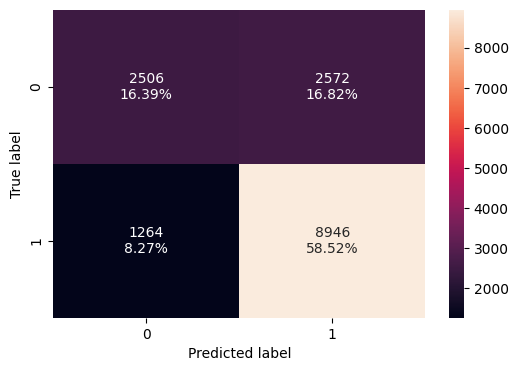

In [222]:
confusion_matrix_sklearn(gbc_tuned, X_train, y_train)
gbc_tuned_model_train_perf = model_performance_classification_sklearn(gbc_tuned,X_train, y_train)
gbc_tuned_model_train_perf


###Checking model performance on validation set

,Accuracy,Recall,Precision,F1
0,0.749,0.873,0.779,0.823


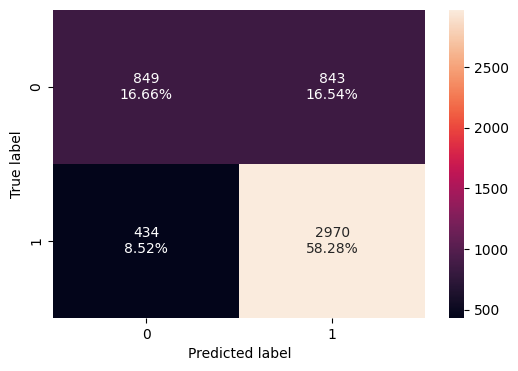

In [223]:
confusion_matrix_sklearn(gbc_tuned, X_val, y_val)
gbc_tuned_model_val_perf = model_performance_classification_sklearn(gbc_tuned,X_val, y_val)
gbc_tuned_model_val_perf

##Hyperparameter Tuning - XGBoost Classifier

In [224]:
%%time
# Choose the type of classifier.
xgb_tuned = XGBClassifier(random_state=1, eval_metric="logloss")

# Grid of parameters to choose from
parameters = {
    "n_estimators": np.arange(10,110,25),
    "scale_pos_weight": [1,2,5],
    "subsample": [0.9, 1],
    "learning_rate": [0.01,0.1,0.05],
    "gamma": [1,3]
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
rand_obj = RandomizedSearchCV(xgb_tuned, parameters, scoring=acc_scorer,cv=5, n_jobs=-1, random_state=1)
rand_obj = rand_obj.fit(X_train_over, y_train_over)

# Set the clf to the best combination of parameters
xgb_tuned = rand_obj.best_estimator_

# Fit the best algorithm to the data.
xgb_tuned.fit(X_train_over, y_train_over)

CPU times: user 822 ms, sys: 36 ms, total: 858 ms
Wall time: 10.1 s


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=1,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=np.int64(35), n_jobs=None,
              num_parallel_tree=None, ...)

###Checking model performance on training set

,Accuracy,Recall,Precision,F1
0,0.735,0.949,0.733,0.827


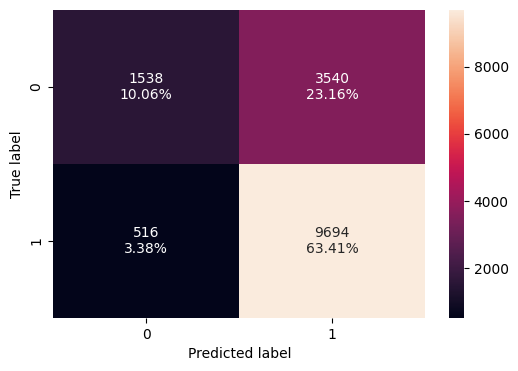

In [225]:
confusion_matrix_sklearn(xgb_tuned, X_train, y_train)
xgb_tuned_model_train_perf = model_performance_classification_sklearn(xgb_tuned,X_train, y_train)
xgb_tuned_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.712,0.955,0.712,0.816


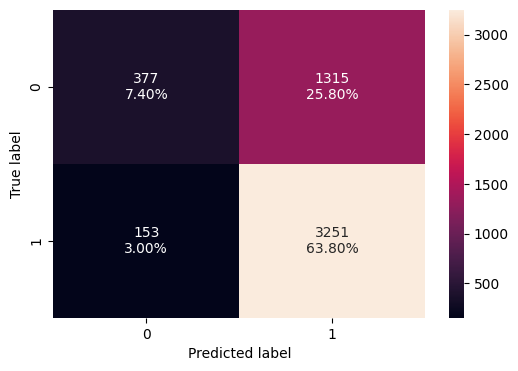

In [231]:
confusion_matrix_sklearn(xgb_tuned, X_val, y_val)
xgb_tuned_model_val_perf = model_performance_classification_sklearn(xgb_tuned,X_val, y_val)
xgb_tuned_model_val_perf

Checking model performance on test set

# **Model Comparison and Final Model Selection**

In [227]:
# Training performance comparison

models_train_comp_df = pd.concat(
    [

        abc_tuned_model_train_perf.T,
        gbc_tuned_model_train_perf.T,
        xgb_tuned_model_train_perf.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [

    "Tuned Adaboost Classifier",
    "Tuned Gradient Boost Classifier",
    "XGBoost Classifier Tuned",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Tuned Adaboost Classifier,Tuned Gradient Boost Classifier,XGBoost Classifier Tuned
Accuracy,0.741,0.749,0.735
Recall,0.875,0.876,0.949
Precision,0.769,0.777,0.733
F1,0.818,0.823,0.827


In [228]:
# validation performance comparison

models_val_comp_df = pd.concat(
    [

        abc_tuned_model_val_perf.T,
        gbc_tuned_model_val_perf.T,
        xgb_tuned_model_val_perf.T,
    ],
    axis=1,
)
models_val_comp_df.columns = [

    "Tuned Adaboost Classifier",
    "Tuned Gradient Boost Classifier",
    "XGBoost Classifier Tuned",
]
print("Training performance comparison:")
models_val_comp_df

Training performance comparison:


,Tuned Adaboost Classifier,Tuned Gradient Boost Classifier,XGBoost Classifier Tuned
Accuracy,0.745,0.749,0.726
Recall,0.875,0.873,0.940
Precision,0.773,0.779,0.728
F1,0.821,0.823,0.821


* The base Gradient Boosting classifier performs the best on the validation dataset, with an 0.823 F1 score.

,Accuracy,Recall,Precision,F1
0,0.740,0.891,0.761,0.821


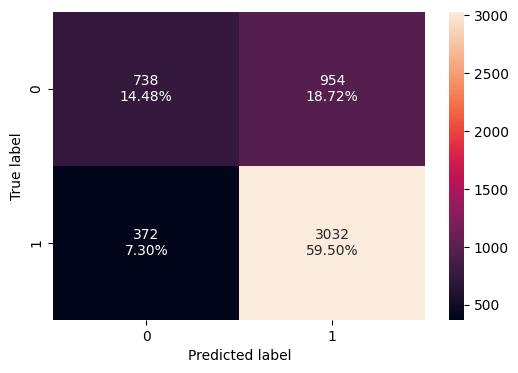

In [240]:
# Test performance comparison

gbc_tuned.fit(X_test, y_test)

confusion_matrix_sklearn(gbc_tuned, X_test, y_test)
gbc_tuned_model_train_perf = model_performance_classification_sklearn(gbc_tuned,X_test, y_test)
gbc_tuned_model_train_perf

* The base Gradient Boosting classifier performs equally well on testing dataset with F1 score of .821 so we will choose this model.

###Feature Importance

In [246]:
print(pd.DataFrame(gbc_tuned.feature_importances_, columns = ["Imp"],
                   index = X_train.columns).sort_values(by = 'Imp', ascending = False).head(10))

                                    Imp
has_job_experience_Y              0.200
education_of_employee_Master's    0.185
education_of_employee_High School 0.134
education_of_employee_Doctorate   0.113
continent_Europe                  0.100
region_of_employment_Midwest      0.061
yr_of_estab                       0.051
prevailing_wage                   0.042
unit_of_wage_Year                 0.031
continent_North America           0.030


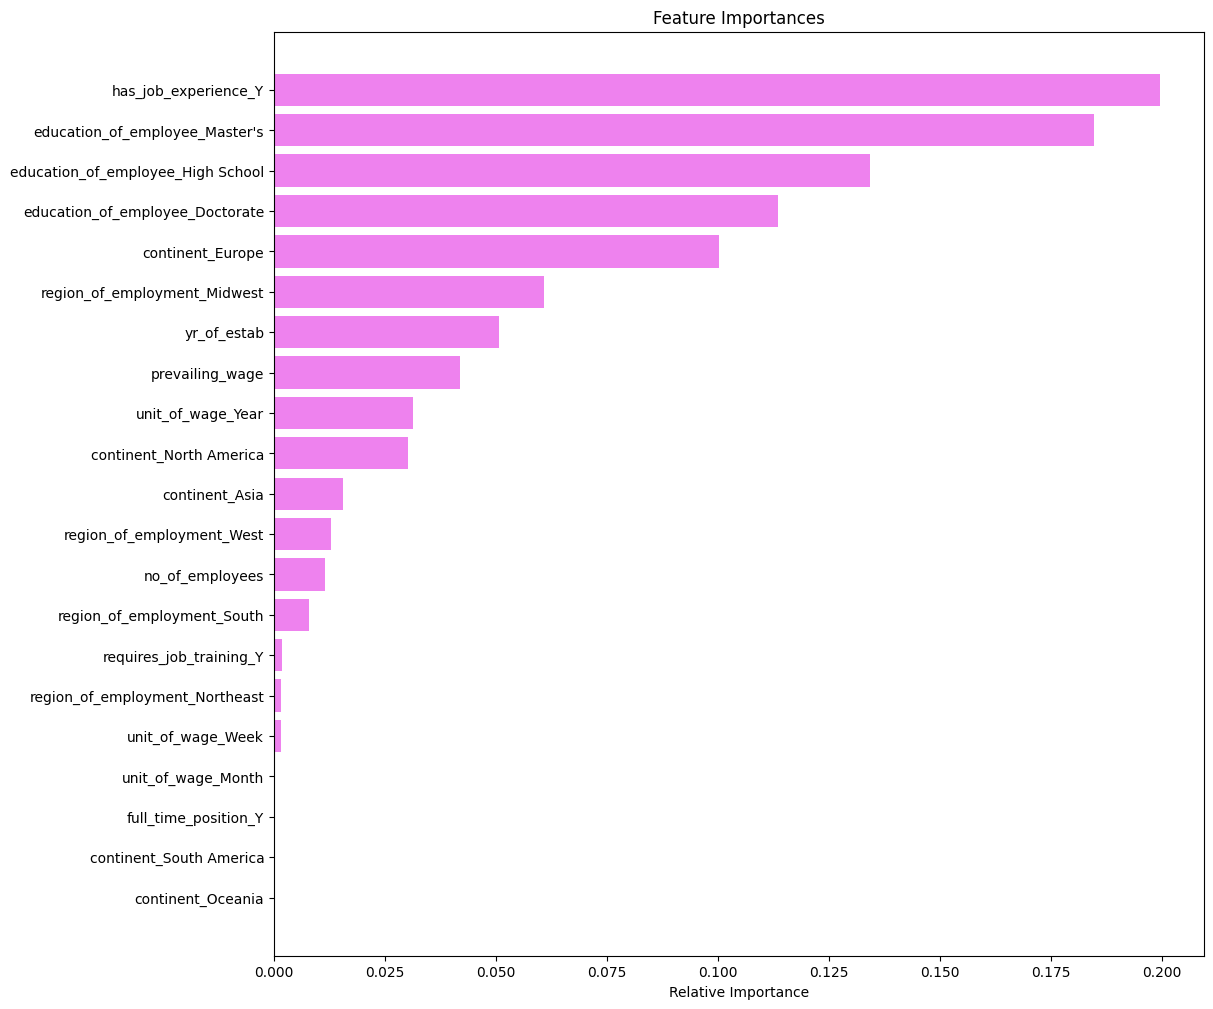

In [244]:
feature_names = X_train.columns
importances = gbc_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

# **Actionable Insights and Recommendations**

**Business Insights**

OFLC has these critical components for pre-screening an applicant
1. Education level - The higher the education level better the approval outcomes
2. Job experience - Prior experience leads to better approval outcomes
3. Applicant Location - Applicants from europe have better outcomes. Business should understand the reasons behind it
4. Some of the insights could lead to bias, should watch out for legal implications

**Model Insights**
* While Gradient Boosting classifier performs the best of all the models created. XGBoost and Adaboost performed equally well
* While the model predicts the outcomes well, some of the data lead to bias.


**Recommendations**
To shortlist the candidates having higher chances of VISA approval. OFLC should

*   Sort the applicants based on education and prioritize the applicants with higher education
*   Prioritize the applicants with prior work experience
*   Understand the reasons behind european applicants having better outcomes



___